In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sys

sys.path.append("..")

import Models.OWID as owid
import Models.SIRD as sird
import Models.GradDescModels as gdm
import Models.process as process

import warnings
warnings.filterwarnings(action='once')

In [2]:
import csv
def loadDictionaryFromFitFile(fileName):
    inputFile = open(fileName, 'r')
    rd = csv.reader(inputFile, delimiter=',') #reader

    fitDict = {}
    for row in rd:
        fitDict[row[0]] = list(map(float, row[1:]))

    inputFile.close()
    return fitDict

In [15]:
#load our model fits
import csv


fitDict = loadDictionaryFromFitFile("..\\..\\Data\\AIRD fits\\fitsMeasures.csv")

print(fitDict["Italy beta2"])

[0.0028321041427295576, 0.0003229406503131157, 1.6440901319249743, 0.006912730687181085, 0.10578942386071483, 3.326543344603479, 9.626733697232503, 0.1812015868209369, -0.06843275402747684, 0.0021066434482079482, -0.01300262352092816]


C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
..\Models\GradDescModels.py:50: RuntimeWarning: invalid value encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


0 New best error:  5.674606332541866e-05
2 New best error:  4.160299617405381e-05
33 New best error:  3.6384874144572004e-05
Iter:  37      

..\Models\GradDescModels.py:50: RuntimeWarning: overflow encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


53 New best error:  3.533918187355943e-05
55 New best error:  2.1860139017664277e-05
63 New best error:  2.111675948337271e-05
134 New best error:  1.654489506707333e-05
171 New best error:  1.4526777830852261e-05
0 New best error:  1.739601325398118e-05
4 New best error:  3.4136854142493854e-06
Iter:  10      

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


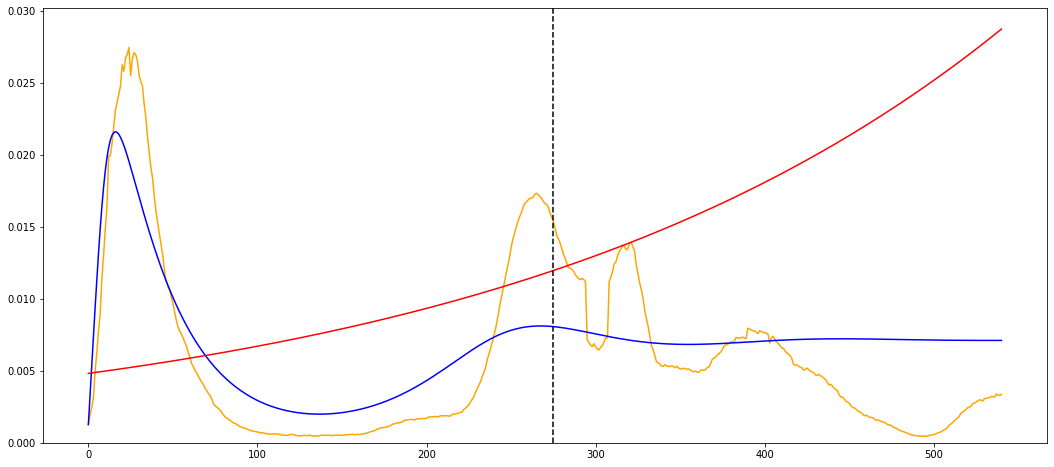

In [7]:
dates, I, R, D, V = owid.LoadCountryNormal("Italy")

consts = [len(I), I[0], max(I), [len(I)]]

startSim = 275
sectionI=I[:startSim]
constsSection = [startSim, I[0], max(I), [startSim]] # fit only on range of [0:startSim] 

itParams =  gdm.getParams(sectionI, constsSection, randomIterCount=250)
itParamsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=50)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(I, color="orange")
ax.plot(gdm.simFunc(itParams, consts), color="blue")
ax.plot(gdm.simFuncConst(itParamsConst, consts), color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


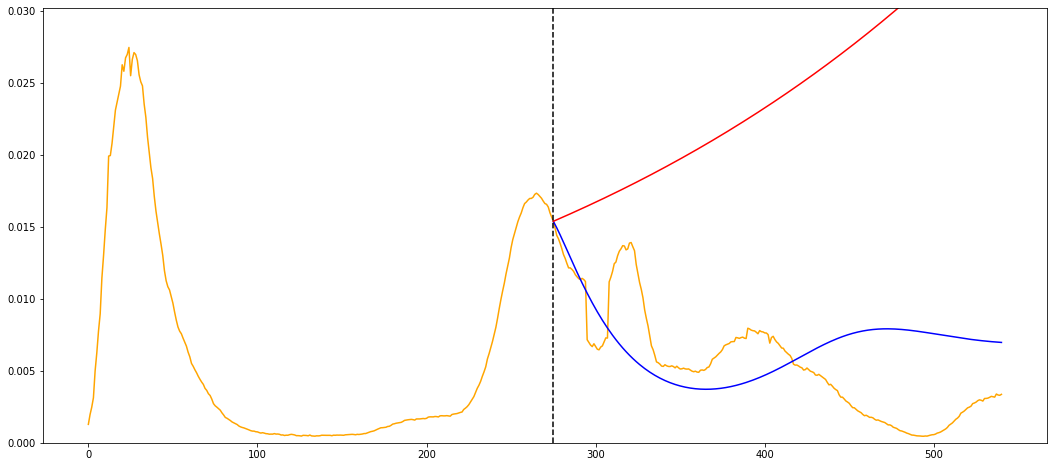

In [8]:
fig, ax = plt.subplots(figsize=(18,8))

itParams2 = itParams.copy()
itParamsConst2 = itParamsConst.copy()

itParamsConst2[0] = I[startSim] #set I[0] to I on the start sim date

simA, simI = gdm.simFunc(itParams, consts, giveA=True) #the normal simulation
itParams2[0] = simA[startSim] #set A[0] as what the simulated A was on the start sim date
itParams2[1] = I[startSim] #set I[0] to actual I on the start sim date

#simulations on sim date and on
simI = gdm.simFunc(itParams2, consts)
simConstI = gdm.simFuncConst(itParamsConst2, consts)

xSeries = np.arange(0,len(I),1)

ax.plot(xSeries, I, color="orange")
ax.plot(xSeries[startSim:], simI[:len(I)-startSim], color="blue")
ax.plot(xSeries[startSim:], simConstI[:len(I)-startSim], color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

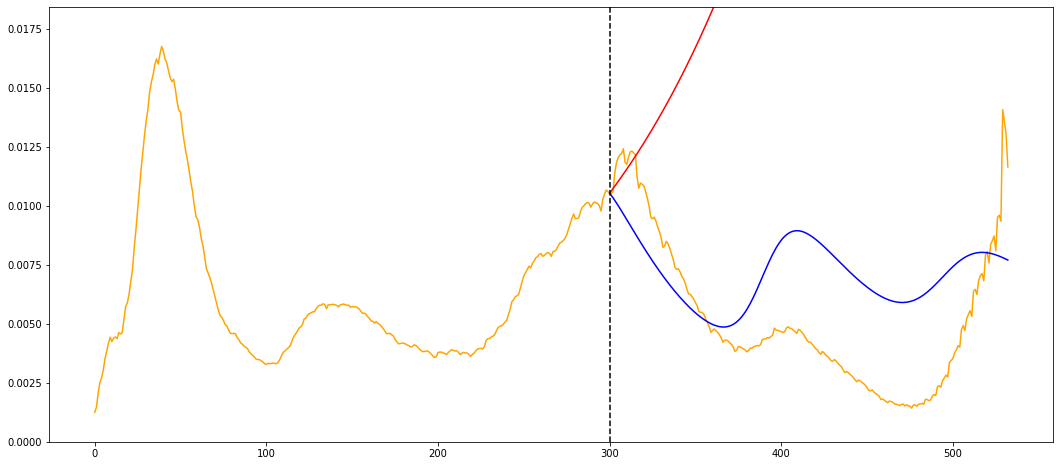

In [57]:
fig, ax = plt.subplots(figsize=(18,8))

usParams2 = usParams.copy()
usParamsConst2 = usParamsConst.copy()

usParamsConst2[0] = I[startSim] #set I[0] to I on the start sim date

simA, simI = gdm.simFunc(usParams, consts, giveA=True) #the normal simulation
usParams2[0] = simA[startSim] #set A[0] as what the simulated A was on the start sim date
usParams2[1] = I[startSim] #set I[0] to actual I on the start sim date

#simulations on sim date and on
simI = gdm.simFunc(usParams2, consts)
simConstI = gdm.simFuncConst(usParamsConst2, consts)

xSeries = np.arange(0,len(I),1)

ax.plot(xSeries, I, color="orange")
ax.plot(xSeries[startSim:], simI[:len(I)-startSim], color="blue")
ax.plot(xSeries[startSim:], simConstI[:len(I)-startSim], color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

..\Models\GradDescModels.py:50: RuntimeWarning: invalid value encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


0 New best error:  7.167972846301494e-05


..\Models\GradDescModels.py:50: RuntimeWarning: overflow encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


2 New best error:  5.048753693481267e-05


..\Models\GradDescModels.py:51: RuntimeWarning: overflow encountered in double_scalars
  diffI = gamma1*A[t] - nu*I[t]
..\Models\GradDescModels.py:51: RuntimeWarning: invalid value encountered in double_scalars
  diffI = gamma1*A[t] - nu*I[t]
..\Models\GradDescModels.py:69: RuntimeWarning: overflow encountered in double_scalars
  error = error + ((y[t] - x[t])**2)*wDecay**(len(y)-t+1) #squared error


3 New best error:  2.8845013943656233e-05
4 New best error:  2.395617153193631e-05
6 New best error:  1.3847855366826905e-05
12 New best error:  1.3178819480410244e-05
13 New best error:  1.1267088881142603e-05
18 New best error:  7.957243484216557e-06
0 New best error:  9.897239243623344e-06


..\Models\GradDescModels.py:474: RuntimeWarning: overflow encountered in double_scalars
  diffI = beta*I[t] - gamma*I[t]
..\Models\GradDescModels.py:475: RuntimeWarning: invalid value encountered in double_scalars
  I[t+1] = diffI + I[t]
..\Models\GradDescModels.py:486: RuntimeWarning: overflow encountered in double_scalars
  error = error + ((y[t] - x[t])**2)*wDecay**(len(y)-t+1) #squared error


10 New best error:  9.871364623217345e-06
17 New best error:  9.79791684532999e-06
30 New best error:  1.1125215976442073e-06


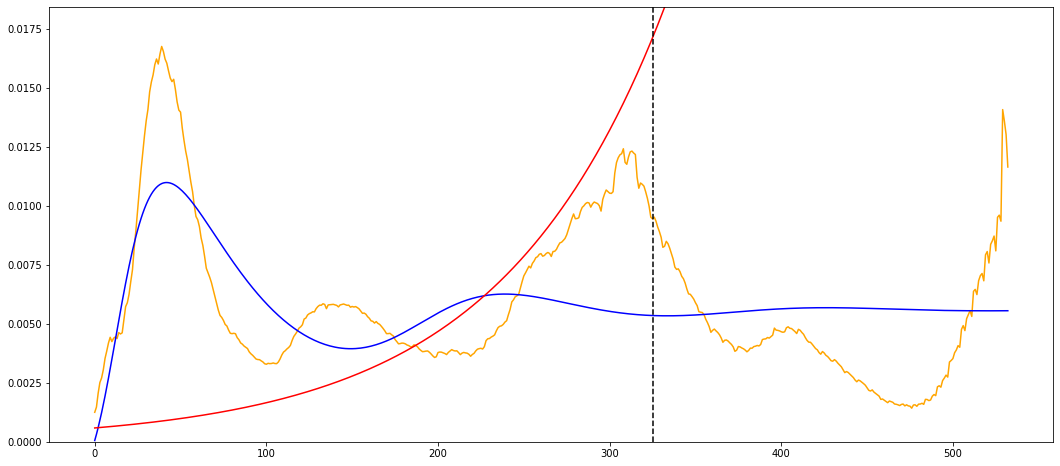

In [59]:
dates, I, R, D, V = owid.LoadCountryNormal("United States")

consts = [len(I), I[0], max(I), [len(I)]]

startSim = 325
sectionI=I[:startSim]
constsSection = [startSim, I[0], max(I), [startSim]] # fit only on range of [0:startSim] 

usParams =  gdm.getParams(sectionI, constsSection, randomIterCount=100)
usParamsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=50)

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(I, color="orange")
ax.plot(gdm.simFunc(usParams, consts), color="blue")
ax.plot(gdm.simFuncConst(usParamsConst, consts), color="red")

ax.set_ylim([0, max(I)*1.1])

ax.axvline(x=startSim, color="black", linestyle='--')

In [65]:
fitFileName = "..\\..\\Data\\AIRD fits\\ItalySimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\ItalySimFitsConst.csv"

simDates = []

dates, I, R, D, V = owid.LoadCountryNormal("Italy")
consts = [len(I), I[0], max(I)]


for simDate in simDates:
    sectionI[:simDate]
    constsSection = [startSim, I[0], max(I)]
    
    params =  gdm.getParams(sectionI, constsSection, randomIterCount=300)
    paramsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=200)

    with open(fitFileName,'a', newline="") as fd: #append the row to fitFileName
        writer = csv.writer(fd)
        row = params.tolist()
        row.insert(0, str(simDate))
        writer.writerow(row)
        
    with open(fitConstFileName,'a', newline="") as fd: #append the row to fitFileName
        writer = csv.writer(fd)
        row = paramsConst.tolist()
        row.insert(0, str(simDate))
        writer.writerow(row)
        
    print(simDate, "is done!")

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [117]:
fitFileName = "..\\..\\Data\\AIRD fits\\USSimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\USSimFitsConst.csv"

simDates = [350, 375]

dates, I, R, D, V = owid.LoadCountryNormal("United States")
consts = [len(I), I[0], max(I)]


for simDate in simDates:
    sectionI[:simDate]
    constsSection = [startSim, I[0], max(I)]
    
    params =  gdm.getParams(sectionI, constsSection, randomIterCount=500)
    paramsConst = gdm.getParamsConst(sectionI, constsSection, wDecay=.97, randomIterCount=300)

    with open(fitFileName,'a', newline="") as fd: #append the row to fitFileName
        writer = csv.writer(fd)
        row = params.tolist()
        row.insert(0, str(simDate))
        writer.writerow(row)
        
    with open(fitConstFileName,'a', newline="") as fd: #append the row to fitFileName
        writer = csv.writer(fd)
        row = paramsConst.tolist()
        row.insert(0, str(simDate))
        writer.writerow(row)
        
    print(simDate, "is done!")

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
..\Models\GradDescModels.py:50: RuntimeWarning: invalid value encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


0 New best error:  3.091811139157917e-05
Iter:  12      

..\Models\GradDescModels.py:50: RuntimeWarning: overflow encountered in double_scalars
  diffA = (beta[0]/ (1 + (beta[1]*I[t])**(beta[2]) ) )*A[t] - gamma0*A[t]


24 New best error:  1.8210602732517363e-05
234 New best error:  1.454492380778464e-05
3 New best error:  1.8265128006551155e-05
9 New best error:  1.826395516034295e-05
15 New best error:  3.5239952981335514e-06
16 New best error:  2.223069979605534e-06
172 New best error:  1.8806706029141136e-06
Iter:  224     

C:\Users\Lemon\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


350 is done!   
0 New best error:  7.755900633136834e-05
2 New best error:  2.7064434300555094e-05
43 New best error:  1.8918400708699584e-05
266 New best error:  1.3520250422403537e-05
1 New best error:  2.2784930466117563e-06
5 New best error:  1.6514306412120713e-06
17 New best error:  1.036043678775487e-06
205 New best error:  7.070384420129027e-07
375 is done!   


Dates available: 
275
250
325
225


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


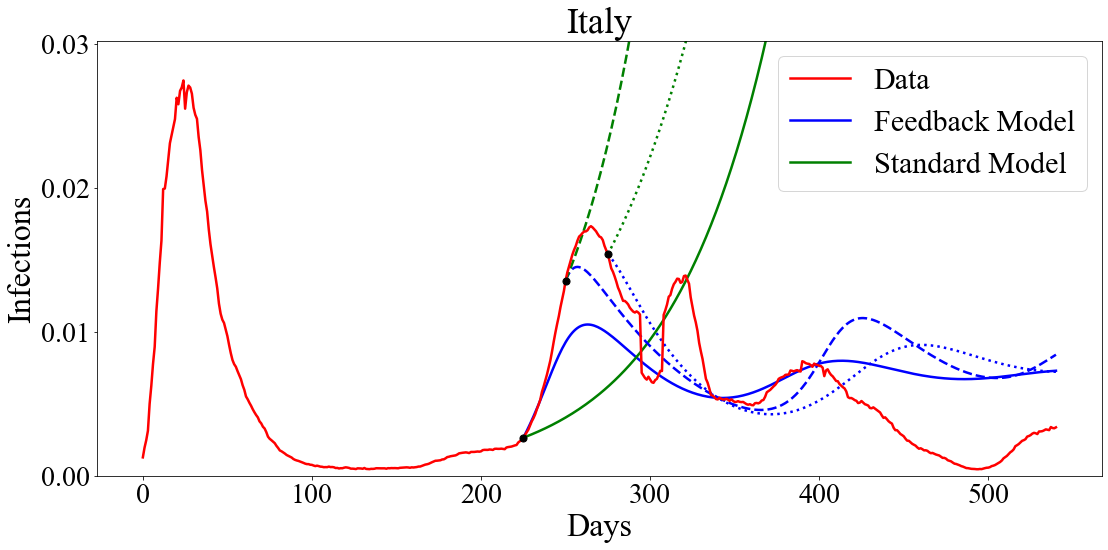

In [20]:
fitFileName = "..\\..\\Data\\AIRD fits\\ItalySimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\ItalySimFitsConst.csv"
italyFits = loadDictionaryFromFitFile(fitFileName)
italyConstFits = loadDictionaryFromFitFile(fitConstFileName)

dates, I, R, D, V = owid.LoadCountryNormal("Italy")
consts = [len(I), I[0], max(I)]

print("Dates available: ")
for simDateStr in italyFits:
    print(simDateStr)

simDateList = ["225", "250", "275"]
linestyles = ["solid", "dashed", "dotted"]

fig, ax = plt.subplots(figsize=(18,8))

import matplotlib.lines
plt.rcParams['font.family'] = "Times New Roman"

for i in range(len(simDateList)):
    simDateStr = simDateList[i]
    params = italyFits[simDateStr]
    paramsConst = italyConstFits[simDateStr]
    simDate = int(simDateStr)
    
    xSeries = np.arange(0,len(I), 1)
    
    simA, simI = gdm.simFunc(params, consts, giveA=True)
    params[0] = simA[simDate]
    params[1] = I[simDate]
    paramsConst[0] = I[simDate]
    
    ax.plot(xSeries[simDate:], gdm.simFunc(params,consts)[:-simDate], color="blue", linewidth=2.5, linestyle=linestyles[i])
    ax.plot(xSeries[simDate:], gdm.simFuncConst(paramsConst,consts)[:-simDate], color="green", linewidth=2.5, linestyle=linestyles[i])
    
ax.plot(xSeries, I, color="red", label="Data", linewidth=2.5)
ax.set_ylim([0, 1.1*max(I)])

ax.set_yticks([0, .01, .02, .03]) #manually set y ticks

ax.set_ylabel("Infections", fontsize=32)
ax.set_xlabel("Days", fontsize=32)
ax.set_title("Italy", fontsize=36)
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

ax.plot([0],[1], color="blue", linewidth=2.5, label="Feedback Model") #to show up in the legend
ax.plot([0],[1], color="green", linewidth=2.5, label="Standard Model") #to show up in the legend
ax.legend(fontsize=30)


for simDateStr in simDateList:
    simDate = int(simDateStr)
    ax.scatter(x=simDate, y=I[simDate], color="black", s=50, zorder=20) #zorder is layer number, s is size
plt.savefig("Figures/ItalySimulations.eps", bbox_inches = 'tight')

Dates available: 
200
225
250
275
300
325
350
375


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


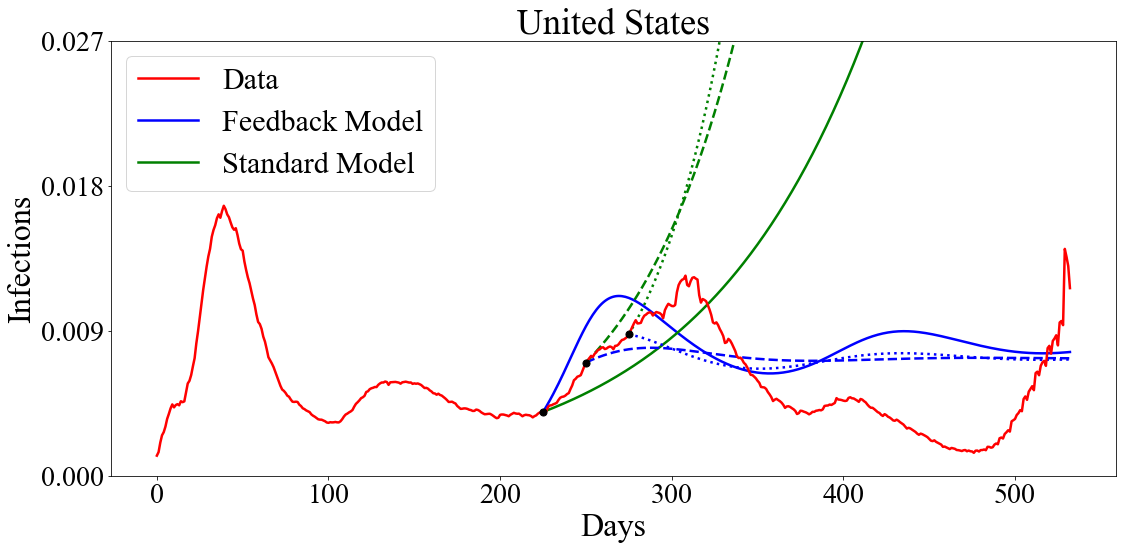

In [22]:
fitFileName = "..\\..\\Data\\AIRD fits\\USSimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\USSimFitsConst.csv"
usFits = loadDictionaryFromFitFile(fitFileName)
usConstFits = loadDictionaryFromFitFile(fitConstFileName)

dates, I, R, D, V = owid.LoadCountryNormal("United States")
consts = [len(I), I[0], max(I)]

print("Dates available: ")
for simDateStr in usFits:
    print(simDateStr)

simDateList = ["225", "250", "275"] #["200", "225", "250", "275", "300", "325", "350", "375"]
linestyles = ["solid", "dashed", "dotted"]

fig, ax = plt.subplots(figsize=(18,8))

import matplotlib.lines
plt.rcParams['font.family'] = "Times New Roman"

for i in range(len(simDateList)):
    simDateStr = simDateList[i]
    params = usFits[simDateStr]
    paramsConst = usConstFits[simDateStr]
    simDate = int(simDateStr)
    
    xSeries = np.arange(0,len(I),1)
    
    simA, simI = gdm.simFunc(params, consts, giveA=True)
    params[0] = simA[simDate]
    params[1] = I[simDate]
    paramsConst[0] = I[simDate]
    
    ax.plot(xSeries[simDate:], gdm.simFunc(params,consts)[:-simDate], color="blue", linewidth=2.5, linestyle=linestyles[i])
    ax.plot(xSeries[simDate:], gdm.simFuncConst(paramsConst,consts)[:-simDate], color="green", linewidth=2.5, linestyle=linestyles[i])
    
    
ax.plot(xSeries, I, color="red", label="Data", linewidth=2.5)
ax.set_ylim([0, 1.1*max(I)])

ax.set_yticks([0, .009, .018, .027]) #manually set y ticks

ax.set_ylabel("Infections", fontsize=32)
ax.set_xlabel("Days", fontsize=32)
ax.set_title("United States", fontsize=36)
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

ax.plot([0],[1], color="blue", linewidth=2.5, label="Feedback Model") #to show up in the legend
ax.plot([0],[1], color="green", linewidth=2.5, label="Standard Model") #to show up in the legend
ax.legend(fontsize=30)

#ax.scatter(x=simDate, y=I[simDate], color="black", label='Simulation Date')

for simDateStr in simDateList:
    simDate = int(simDateStr)
    ax.scatter(x=simDate, y=I[simDate], color="black", s=50, zorder=20) #zorder is layer number, s is size
#plt.savefig("Figures/USSimulations.eps", bbox_inches = 'tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


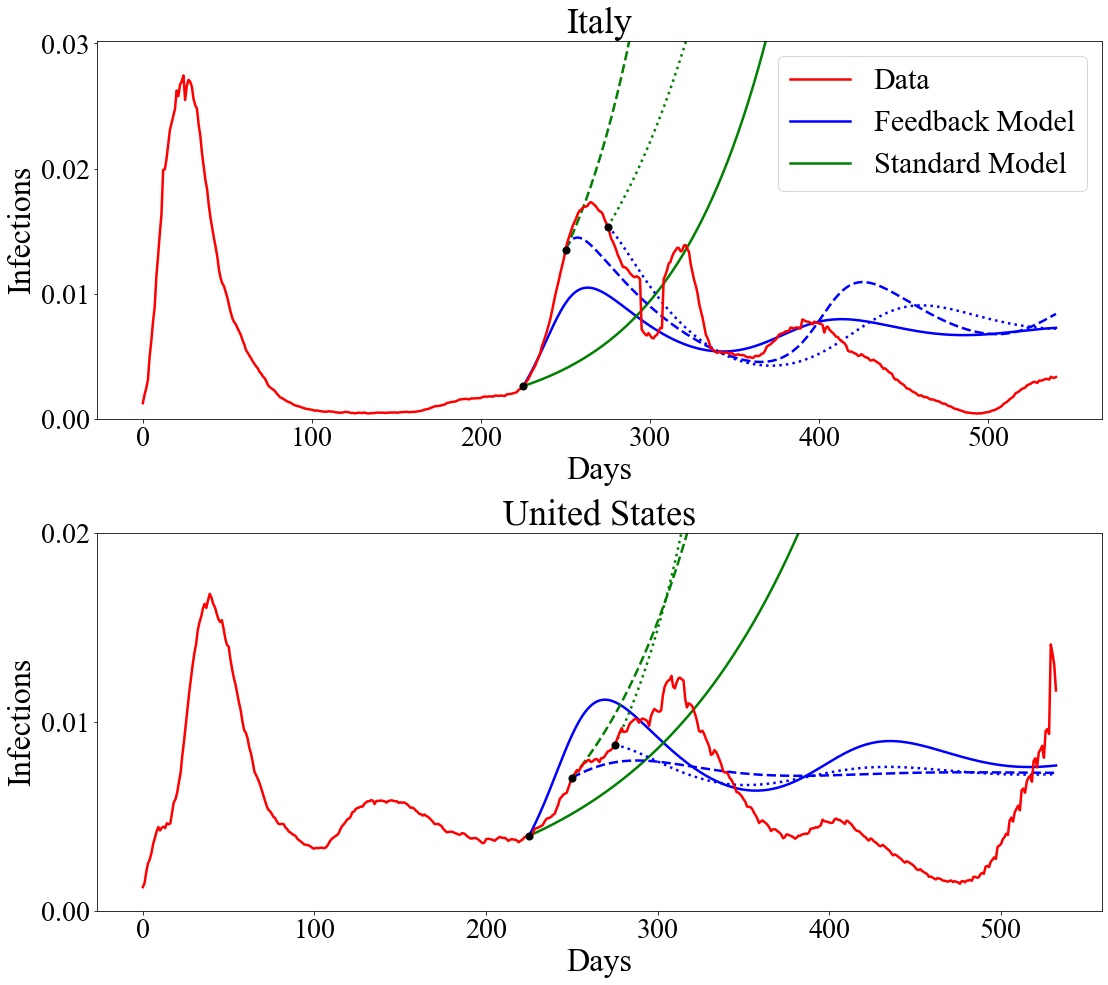

In [38]:
#merge both plots together
import matplotlib.lines

fig, ax = plt.subplots(2,1, figsize=(18,8*2))
plt.rcParams['font.family'] = "Times New Roman"

simDateList = ["225", "250", "275"]
linestyles = ["solid", "dashed", "dotted"]

######################################################## first plot

fitFileName = "..\\..\\Data\\AIRD fits\\ItalySimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\ItalySimFitsConst.csv"
italyFits = loadDictionaryFromFitFile(fitFileName)
italyConstFits = loadDictionaryFromFitFile(fitConstFileName)

dates, I, R, D, V = owid.LoadCountryNormal("Italy")
consts = [len(I), I[0], max(I)]

for i in range(len(simDateList)):
    simDateStr = simDateList[i]
    params = italyFits[simDateStr]
    paramsConst = italyConstFits[simDateStr]
    simDate = int(simDateStr)
    
    xSeries = np.arange(0,len(I), 1)
    
    simA, simI = gdm.simFunc(params, consts, giveA=True)
    params[0] = simA[simDate]
    params[1] = I[simDate]
    paramsConst[0] = I[simDate]
    
    ax[0].plot(xSeries[simDate:], gdm.simFunc(params,consts)[:-simDate], color="blue", linewidth=2.5, linestyle=linestyles[i])
    ax[0].plot(xSeries[simDate:], gdm.simFuncConst(paramsConst,consts)[:-simDate], color="green", linewidth=2.5, linestyle=linestyles[i])
    
ax[0].plot(xSeries, I, color="red", label="Data", linewidth=2.5)
ax[0].set_ylim([0, 1.1*max(I)])

ax[0].set_yticks([0, .01, .02, .03]) #manually set y ticks

ax[0].set_ylabel("Infections", fontsize=32)
ax[0].set_xlabel("Days", fontsize=32)
ax[0].set_title("Italy", fontsize=36)
ax[0].tick_params(axis='x', labelsize=28)
ax[0].tick_params(axis='y', labelsize=28)

ax[0].plot([0],[1], color="blue", linewidth=2.5, label="Feedback Model") #to show up in the legend
ax[0].plot([0],[1], color="green", linewidth=2.5, label="Standard Model") #to show up in the legend
ax[0].legend(fontsize=30)


for simDateStr in simDateList:
    simDate = int(simDateStr)
    ax[0].scatter(x=simDate, y=I[simDate], color="black", s=50, zorder=20) #zorder is layer number, s is size

######################################################## second plot

fitFileName = "..\\..\\Data\\AIRD fits\\USSimFits.csv"
fitConstFileName = "..\\..\\Data\\AIRD fits\\USSimFitsConst.csv"
usFits = loadDictionaryFromFitFile(fitFileName)
usConstFits = loadDictionaryFromFitFile(fitConstFileName)

dates, I, R, D, V = owid.LoadCountryNormal("United States")
consts = [len(I), I[0], max(I)]

for i in range(len(simDateList)):
    simDateStr = simDateList[i]
    params = usFits[simDateStr]
    paramsConst = usConstFits[simDateStr]
    simDate = int(simDateStr)
    
    xSeries = np.arange(0,len(I),1)
    
    simA, simI = gdm.simFunc(params, consts, giveA=True)
    params[0] = simA[simDate]
    params[1] = I[simDate]
    paramsConst[0] = I[simDate]
    
    ax[1].plot(xSeries[simDate:], gdm.simFunc(params,consts)[:-simDate], color="blue", linewidth=2.5, linestyle=linestyles[i])
    ax[1].plot(xSeries[simDate:], gdm.simFuncConst(paramsConst,consts)[:-simDate], color="green", linewidth=2.5, linestyle=linestyles[i])
    
    
ax[1].plot(xSeries, I, color="red", label="Data", linewidth=2.5)
ax[1].set_ylim([0, 1.1*max(I)])

ax[1].set_yticks([0, .01, .02]) #manually set y ticks

ax[1].set_ylabel("Infections", fontsize=32)
ax[1].set_xlabel("Days", fontsize=32)
ax[1].set_title("United States", fontsize=36)
ax[1].tick_params(axis='x', labelsize=28)
ax[1].tick_params(axis='y', labelsize=28)

ax[1].plot([0],[1], color="blue", linewidth=2.5, label="Feedback Model") #to show up in the legend
ax[1].plot([0],[1], color="green", linewidth=2.5, label="Standard Model") #to show up in the legend
#ax[1].legend(fontsize=30)

#ax.scatter(x=simDate, y=I[simDate], color="black", label='Simulation Date')

for simDateStr in simDateList:
    simDate = int(simDateStr)
    ax[1].scatter(x=simDate, y=I[simDate], color="black", s=50, zorder=20) #zorder is layer number, s is size
    

fig.subplots_adjust(hspace=.3)
#save the figure
plt.savefig("Figures/SimFigure.eps", bbox_inches = 'tight')
plt.savefig("Figures/SimFigure.jpeg", bbox_inches = 'tight')